###  Обязательная часть   

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.   

Требования к анализу:   
   
   * построить не менее 4 визуализаций различных видов;   
   * каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;   
   * по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).   
      
#### Откуда брать данные?
   
Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
   
   * [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps)
   * [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new)   
   * [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness)

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Для анализа беру данные с https://github.com/slim0825/slim_pyda_20/blob/main/imdb_1000.csv

In [102]:
movies = pd.read_csv('imdb_1000.csv')

In [103]:
movies.head(100)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
95,8.4,All About Eve,APPROVED,Drama,138,"[u'Bette Davis', u'Anne Baxter', u'George Sand..."
96,8.4,Yojimbo,UNRATED,Action,110,"[u'Toshir\xf4 Mifune', u'Eijir\xf4 T\xf4no', u..."
97,8.4,The Sting,PG,Comedy,129,"[u'Paul Newman', u'Robert Redford', u'Robert S..."
98,8.4,Rashomon,UNRATED,Crime,88,"[u'Toshir\xf4 Mifune', u'Machiko Ky\xf4', u'Ma..."


In [125]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  979 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


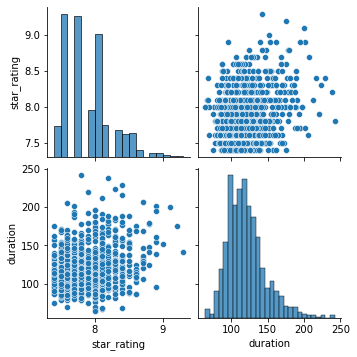

In [126]:
sns.pairplot(movies)

In [107]:
movies['duration'].mean() ### вычисляем среднюю продолжительность фильма

120.97957099080695

In [127]:
movies.sort_values('duration') ### сортируем movies по продолжительности, чтобы найти самые короткие и самые длинные фильмы

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


<AxesSubplot:title={'center':'Duration of the film'}, ylabel='Frequency'>

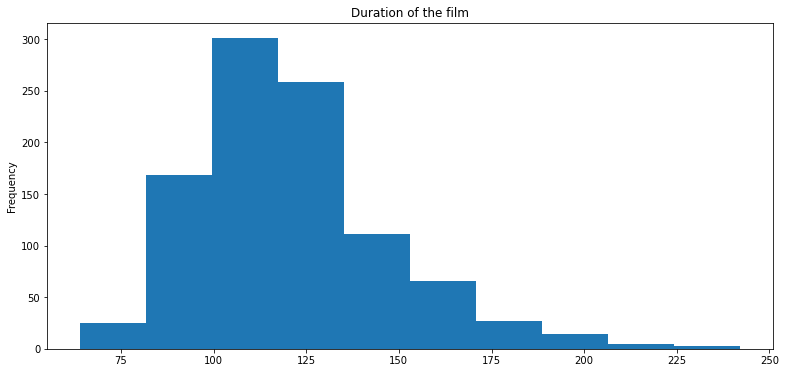

In [138]:
### создаем гистограмму продолжительности
movies['duration'].plot(kind='hist',
                        bins=10,
                        title='Duration of the film',
                        xlabel='Duration')
### на этой гистограмме мы можем видеть, что большая часть фильмов находится в диапазоне 100-130 мин, и самую малую часть
### занимают фильмы с продолжительностью от 205 мин. 

<AxesSubplot:>

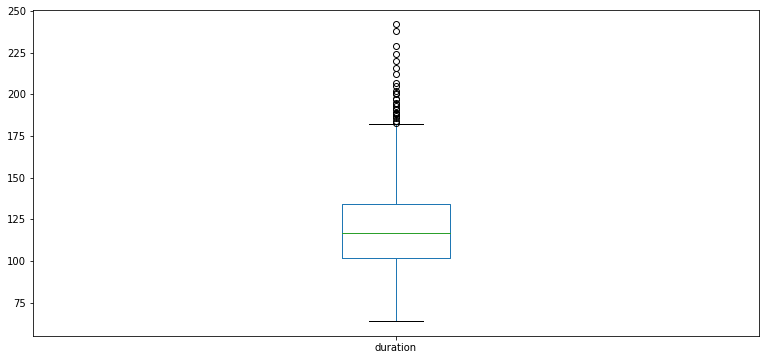

In [111]:
### создаем 'ящик с усами'
movies['duration'].plot(kind='box')
### Бокс говорит нам то же самое, что большинство фильмов имеют продолжительность от 100-130 мин, а также у нас есть четкая 
### медиана. В то время как с гистограммой мы не могли четко определить медианное значение.

In [112]:
### посмотрим какие рейтинги для фильмов у нас есть и какой количество для каждого
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


<AxesSubplot:title={'center':'Визуализация рейтинга фильмов'}, xlabel='Рейтинг фильма', ylabel='Количество фильмов'>

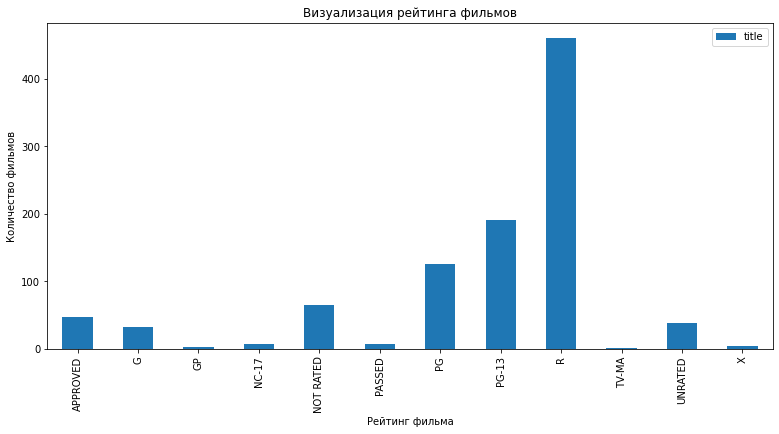

In [148]:
movies[['content_rating', 'title']].groupby('content_rating').count().plot(kind='bar', 
                                                                           title='Визуализация рейтинга фильмов',
                                                                           xlabel='Рейтинг фильма',
                                                                           ylabel='Количество фильмов')
### как видим из столбчатой диаграммы, натбольшее количесво фильмов имеет рейтингR (Лицам до 17 лет обязательно 
### присутствие взрослого)

<AxesSubplot:title={'center':'duration'}, xlabel='star_rating'>

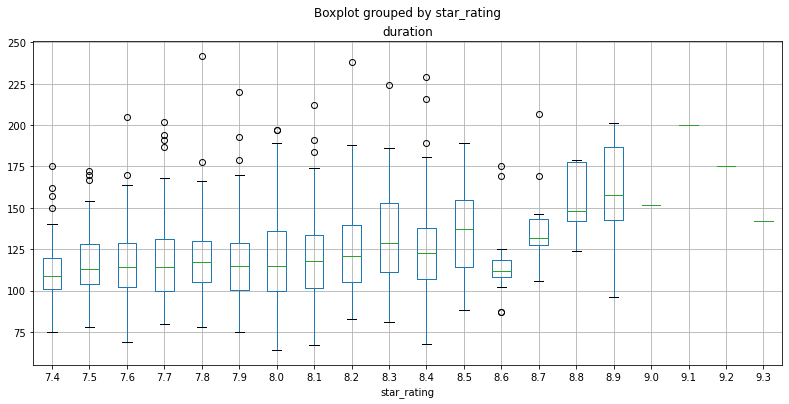

In [151]:
### используя визуализацию, определим, существует ли связь между продолжительностью и оценкой фильмов
movies.boxplot(column='duration', by='star_rating')
### данная визуализация говорит нам о том, что если продолжительность фильма меньше 125 минут, 
### вероятность получить оценку выше.

In [120]:
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


<AxesSubplot:title={'center':'Визуализация продолжительности по жанру'}, xlabel='Жанр фильма', ylabel='Продолжительность фильма'>

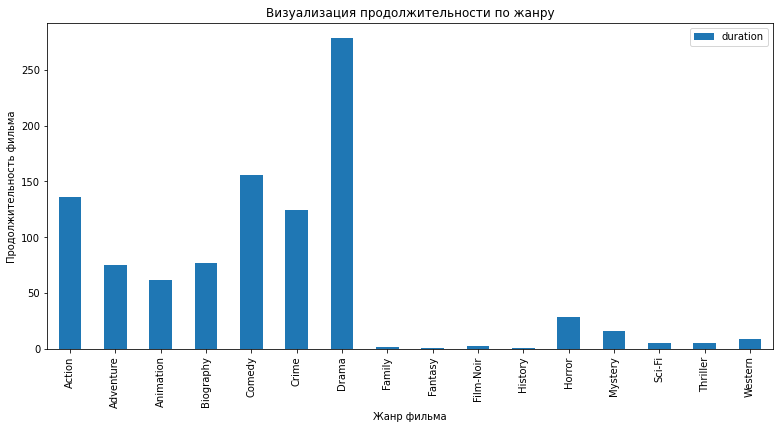

In [154]:
movies[['duration', 'genre']].groupby('genre').count().plot(kind='bar', 
                                                            title='Визуализация продолжительности по жанру',
                                                            xlabel='Жанр фильма',
                                                            ylabel='Продолжительность фильма')
### как видим из визуализации, самый продолжительные фильмы это Drama